In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 한 실행칸에 프린트 여러개 해도 다 출력시키도록 하는 코드.
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
pd.set_option('display.max_rows', 500)
from datetime import datetime
import scipy as sp
import scipy.stats
from scipy.optimize import minimize, minimize_scalar
from scipy.interpolate import interp1d
from string import ascii_uppercase
from itertools import permutations
from sklearn.linear_model import LinearRegression

# 1번

In [31]:
def alphabet_generator(n):
    ints = np.random.randint(0, 26, size = n) + 65
    _dict = dict(zip(list(ascii_uppercase), np.zeros(len(list(ascii_uppercase)))))
    for i in range(len(ints)):
        _dict[chr(ints[i])] = _dict[chr(ints[i])] + 1
    return _dict

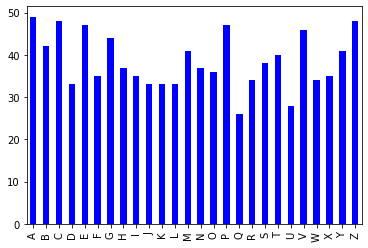

In [38]:
alpha_freq_series = pd.Series(alphabet_generator(1000))
alpha_freq_series.plot(kind = 'bar', color = 'b')
plt.show()

# 2번

In [51]:
f1 = open("./Data2.txt", 'r', encoding = 'utf-8')
arr = []
while True:
    line = f1.readline()
    if not line: 
        break
    else:
        tmp = line.split()
        for i in range(len(tmp)):
            arr.append(tmp[i])
arr

['A;B;C;D', '0;50;10;45', '50;0;25;40', '10;25;0;25', '45;40;25;0']

In [52]:
region = arr[0].split(';')
arr = arr[1:]
distance = []
for i in range(len(arr)):
    distance.append(arr[i].split(';'))
distance

# str to int
for i in range(len(distance)):
    for j in range(len(distance)):
        distance[i][j] = int(distance[i][j])
distance

[['0', '50', '10', '45'],
 ['50', '0', '25', '40'],
 ['10', '25', '0', '25'],
 ['45', '40', '25', '0']]

[[0, 50, 10, 45], [50, 0, 25, 40], [10, 25, 0, 25], [45, 40, 25, 0]]

In [60]:
_list = list(permutations(list(range(len(region))), len(region)))
for i in range(len(_list)):
    _list[i] = _list[i] + (_list[i][0], )
_list

[(0, 1, 2, 3),
 (0, 1, 3, 2),
 (0, 2, 1, 3),
 (0, 2, 3, 1),
 (0, 3, 1, 2),
 (0, 3, 2, 1),
 (1, 0, 2, 3),
 (1, 0, 3, 2),
 (1, 2, 0, 3),
 (1, 2, 3, 0),
 (1, 3, 0, 2),
 (1, 3, 2, 0),
 (2, 0, 1, 3),
 (2, 0, 3, 1),
 (2, 1, 0, 3),
 (2, 1, 3, 0),
 (2, 3, 0, 1),
 (2, 3, 1, 0),
 (3, 0, 1, 2),
 (3, 0, 2, 1),
 (3, 1, 0, 2),
 (3, 1, 2, 0),
 (3, 2, 0, 1),
 (3, 2, 1, 0)]

[(0, 1, 2, 3, 0),
 (0, 1, 3, 2, 0),
 (0, 2, 1, 3, 0),
 (0, 2, 3, 1, 0),
 (0, 3, 1, 2, 0),
 (0, 3, 2, 1, 0),
 (1, 0, 2, 3, 1),
 (1, 0, 3, 2, 1),
 (1, 2, 0, 3, 1),
 (1, 2, 3, 0, 1),
 (1, 3, 0, 2, 1),
 (1, 3, 2, 0, 1),
 (2, 0, 1, 3, 2),
 (2, 0, 3, 1, 2),
 (2, 1, 0, 3, 2),
 (2, 1, 3, 0, 2),
 (2, 3, 0, 1, 2),
 (2, 3, 1, 0, 2),
 (3, 0, 1, 2, 3),
 (3, 0, 2, 1, 3),
 (3, 1, 0, 2, 3),
 (3, 1, 2, 0, 3),
 (3, 2, 0, 1, 3),
 (3, 2, 1, 0, 3)]

In [69]:
result2 = []
min_distance_sum = np.inf
for i in range(len(_list)):
    tmp_distance_sum = 0
    for j in range(len(_list[i])-1):
        tmp_distance_sum = tmp_distance_sum + distance[_list[i][j]][_list[i][j+1]]
    if(tmp_distance_sum < min_distance_sum):
        min_distance_sum = tmp_distance_sum
        result2.clear()
        result2.append(_list[i])
    elif(tmp_distance_sum == min_distance_sum):
        result2.append(_list[i])
    else:
        continue
result2
min_distance_sum

[(0, 2, 1, 3, 0),
 (0, 3, 1, 2, 0),
 (1, 2, 0, 3, 1),
 (1, 3, 0, 2, 1),
 (2, 0, 3, 1, 2),
 (2, 1, 3, 0, 2),
 (3, 0, 2, 1, 3),
 (3, 1, 2, 0, 3)]

120

In [72]:
final_result2 = []
for i in range(len(result2)):
    tmp = []
    for j in range(len(result2[i]) - 1):
        tmp.append(region[result2[i][j]])
    final_result2.append(tmp)

for i in final_result2:
    print(i)
print('Min.Length = {}'.format(min_distance_sum))
        

['A', 'C', 'B', 'D']
['A', 'D', 'B', 'C']
['B', 'C', 'A', 'D']
['B', 'D', 'A', 'C']
['C', 'A', 'D', 'B']
['C', 'B', 'D', 'A']
['D', 'A', 'C', 'B']
['D', 'B', 'C', 'A']
Min.Length = 120


# 3번

## (1)

In [108]:
rv = sp.stats.norm(loc = 0, scale = 1)
samples = rv.rvs(size = [100000, 10], random_state = 0).sum(axis = 1)
(rv.rvs(size = 100000, random_state = 0) > 0).sum()

50067

In [115]:
rv = sp.stats.norm(loc = 0, scale = 1)
samples = rv.rvs(size = [100000, 10], random_state = 0).sum(axis = 1)
#samples
mean = samples.mean()
std = samples.std()
print("Mean : {}, Std : {}".format(mean, std))

Mean : 0.015121465155362316, Std : 3.1605336330064304


## (2)

array([[  1.78862847,   2.22513832,   2.32163579, ..., -12.72165071,
        -13.02185678, -10.86370744],
       [  0.87428572,  -0.41925091,  -0.49899185, ...,  -2.67199419,
         -2.76723179,  -3.29441957],
       [ -0.32158469,  -0.17045432,  -0.18908204, ...,  26.28483382,
         27.78809577,  28.69641449],
       ...,
       [  1.39612182,   0.63962884,   0.69284682, ...,  -3.30022812,
         -4.26376217,  -5.54190611],
       [ -0.91904023,  -1.72585927,  -2.77117803, ...,  -2.84755129,
         -0.06117975,  -0.50198865],
       [  0.24830512,   1.1371107 ,  -0.37432954, ..., -12.16919564,
        -11.77778226, -12.34366377]])

array([10, 76,  0, ..., 29,  2, 47])

(array([22672.,  6268.,  6631.,  5780.,  4853.,  4230.,  3640.,  3205.,
         2668.,  2387.,  2131.,  1847.,  1683.,  1547.,  1514.,  1345.,
         1211.,  1141.,  1050.,   978.,   904.,   949.,   822.,   718.,
          734.,   726.,   705.,   592.,   542.,   637.,   537.,   492.,
          529.,   478.,   490.,   461.,   444.,   400.,   382.,   365.,
          368.,   358.,   353.,   329.,   319.,   342.,   294.,   311.,
          302.,   263.,   270.,   269.,   242.,   256.,   234.,   243.,
          205.,   191.,   211.,   235.,   223.,   204.,   205.,   172.,
          204.,   165.,   176.,   158.,   151.,   151.,   175.,   154.,
          145.,   157.,   156.,   152.,   183.,   129.,   168.,   135.,
          131.,   131.,   128.,   130.,   124.,   140.,   129.,   103.,
          111.,   122.,   105.,   115.,   127.,   111.,   108.,   115.,
          102.,   119.,   101.,   102.]),
 array([ 0.  ,  0.99,  1.98,  2.97,  3.96,  4.95,  5.94,  6.93,  7.92,
         8.91,  9.9 , 1

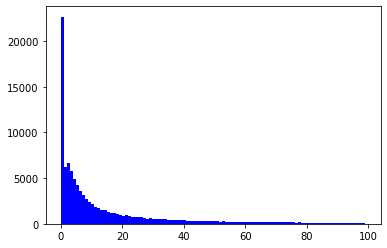

In [165]:
rv2 = sp.stats.norm(loc = 0, scale = 1)
samples2 = rv2.rvs(size = [100000, 100], random_state = 3).cumsum(axis = 1)
samples2
default = np.argmax(samples2 <= -2, axis = 1)
default
plt.hist(default, bins = 100, color = 'B')
plt.show()

# 4번

## (1)

In [199]:
data4 = pd.read_csv('./Data4.csv')
data4.head()
data4.dtypes

,DATE,PAYEMS,DJIA
0,2006-03-06,NaN,10958.59
1,2006-03-07,NaN,10980.69
2,2006-03-08,NaN,11005.74
3,2006-03-09,NaN,10972.28
4,2006-03-10,NaN,11076.34


DATE       object
PAYEMS    float64
DJIA      float64
dtype: object

In [200]:
data4.DATE = pd.to_datetime(data4.DATE)
data4.set_index('DATE', inplace = True)

In [201]:
data4_per_month = data4.resample('M').mean()

In [202]:
data4_per_month.head()

,PAYEMS,DJIA
DATE,,
2006-03-31,NaN,11161.086000
2006-04-30,136232.0,11234.675263
2006-05-31,136255.0,11333.878182
2006-06-30,136337.0,10997.965455
2006-07-31,136544.0,11032.526000


In [203]:
data4_per_month['dPAYEMS'] = data4_per_month['PAYEMS'].diff()
data4_per_month['DJIA_log'] = np.log(data4_per_month['DJIA'])
data4_per_month.head()

,PAYEMS,DJIA,dPAYEMS,DJIA_log
DATE,,,,
2006-03-31,NaN,11161.086000,NaN,9.320189
2006-04-30,136232.0,11234.675263,NaN,9.326760
2006-05-31,136255.0,11333.878182,23.0,9.335552
2006-06-30,136337.0,10997.965455,82.0,9.305466
2006-07-31,136544.0,11032.526000,207.0,9.308603


In [204]:
data4_per_month['dDJIA_log'] = data4_per_month['DJIA_log'].diff()
data4_per_month.head()

,PAYEMS,DJIA,dPAYEMS,DJIA_log,dDJIA_log
DATE,,,,,
2006-03-31,NaN,11161.086000,NaN,9.320189,NaN
2006-04-30,136232.0,11234.675263,NaN,9.326760,0.006572
2006-05-31,136255.0,11333.878182,23.0,9.335552,0.008791
2006-06-30,136337.0,10997.965455,82.0,9.305466,-0.030086
2006-07-31,136544.0,11032.526000,207.0,9.308603,0.003138


In [205]:
data4_per_month['dDJIA_log'].corr(data4_per_month['dPAYEMS'])

0.2446507127822187

## (2)

In [216]:
data4_2 = data4_per_month.copy()
data4_2.dropna(axis = 0, inplace = True)

In [217]:
X = data4_2['dPAYEMS']
y = data4_2['dDJIA_log']

In [218]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
print('Beta is {}'.format(round(line_fitter.coef_[0], 3)))
print('alpha is {}'.format(round(line_fitter.intercept_, 3)))

Beta is 0.0
alpha is 0.001


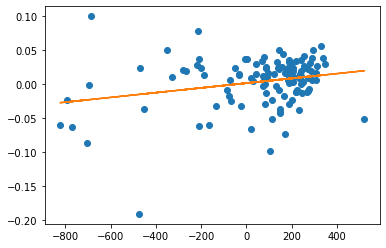

In [224]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()